[View in Colaboratory](https://colab.research.google.com/github/YansongPeng/Python-OpenCV-Projects/blob/master/Convolutional_Neural_Networks.ipynb)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
import random

In [0]:
np.random.seed(0)

In [0]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


In [77]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
assert(X_train.shape[0] == Y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28, 28)), "The dimensions of the image are not 28 x 28."
assert(X_test.shape[0] == Y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28, 28)), "The dimension of the image are not 28 x 28."


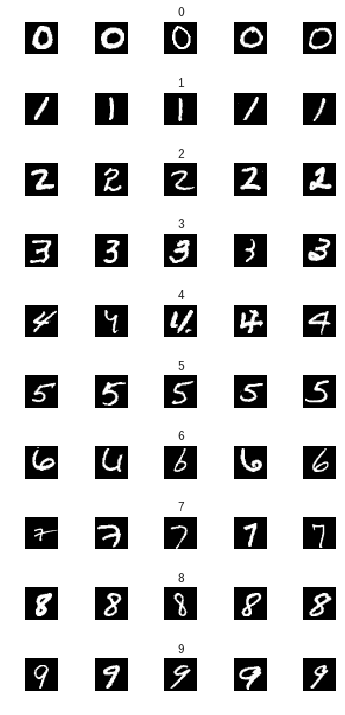

In [79]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[Y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap = plt.get_cmap('gray'))
        axs[j][i].axis('off')
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))
        

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


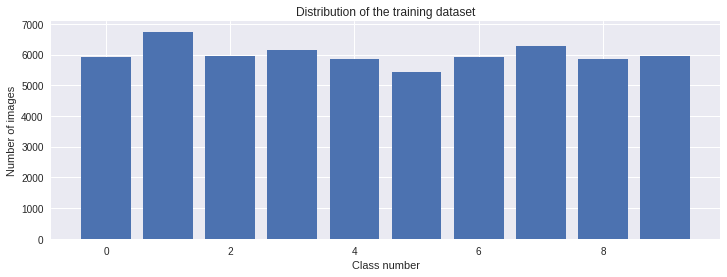

In [80]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title('Distribution of the training dataset')
plt.xlabel('Class number')
plt.ylabel('Number of images')
plt.show()

In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)


In [0]:
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)


In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
# define the leNet_model function
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape = (28, 28, 1), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Conv2D(15, (3, 3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Flatten())
  model.add(Dense(500, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation = 'softmax'))
  model.compile(Adam(lr = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [85]:
model = leNet_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
__________

In [86]:
history = model.fit(X_train, Y_train, epochs = 10, validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 54us/step - loss: 0.2461 - acc: 0.9213 - val_loss: 0.0511 - val_acc: 0.9853
Epoch 2/10
54000/54000 [==============================] - 2s 45us/step - loss: 0.0675 - acc: 0.9801 - val_loss: 0.0396 - val_acc: 0.9875
Epoch 3/10
54000/54000 [==============================] - 2s 45us/step - loss: 0.0579 - acc: 0.9822 - val_loss: 0.0369 - val_acc: 0.9895
Epoch 4/10
54000/54000 [==============================] - 2s 44us/step - loss: 0.0519 - acc: 0.9839 - val_loss: 0.0370 - val_acc: 0.9888
Epoch 5/10
54000/54000 [==============================] - 2s 44us/step - loss: 0.0428 - acc: 0.9870 - val_loss: 0.0366 - val_acc: 0.9910
Epoch 6/10
54000/54000 [==============================] - 2s 44us/step - loss: 0.0423 - acc: 0.9872 - val_loss: 0.0368 - val_acc: 0.9895
Epoch 7/10
54000/54000 [==============================] - 2s 43us/step - loss: 0.0388 - acc: 0.9883 - val_loss: 0.0387 - val_acc:

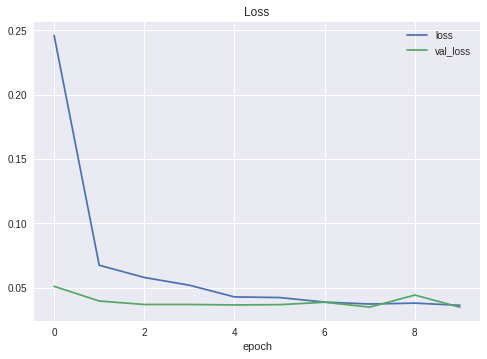

In [87]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.show()

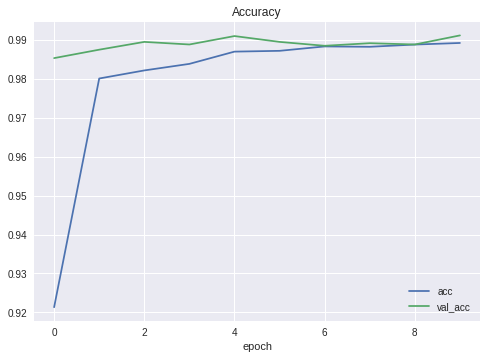

In [88]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

In [89]:
score = model.evaluate(X_test, Y_test, verbose = 0)
print(type(score))
print('Test Score: ', score[0])
print('Test Accuracy: ', score[1])

<class 'list'>
Test Score:  0.03472171888367975
Test Accuracy:  0.9893


<Response [200]>


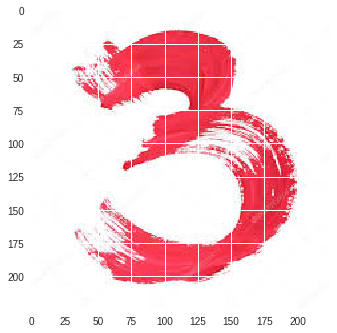

In [90]:
import requests
from PIL import Image

url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST8KzXHtkSHcxzdpnllMhAj0upLEwnNFdtY6j4YUPcmaf4Ty3u'

response = requests.get(url, stream = True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)

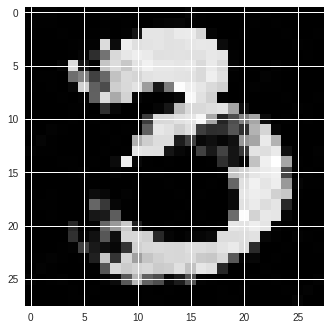

In [91]:
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap = plt.get_cmap('gray'))

In [0]:
image = image/255
image = image.reshape(1, 28, 28, 1)


In [93]:
prediction = model.predict_classes(image)
print("Predicted Digit: ", str(prediction))

Predicted Digit:  [3]


In [95]:
score = model.evaluate(X_test, Y_test, verbose = 0)
print(type(score))
print('Test Score: ', score[0])
print('Test Accuracy: ', score[1])

<class 'list'>
Test Score:  0.03472171888367975
Test Accuracy:  0.9893


In [102]:
layer1 = Model(inputs = model.layers[0].input, outputs = model.layers[0].output)
layer2 = Model(inputs = model.layers[0].input, outputs = model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(image), layer2.predict(image)
print(visual_layer1.shape)
print(visual_layer2.shape)



(1, 24, 24, 30)
(1, 10, 10, 15)


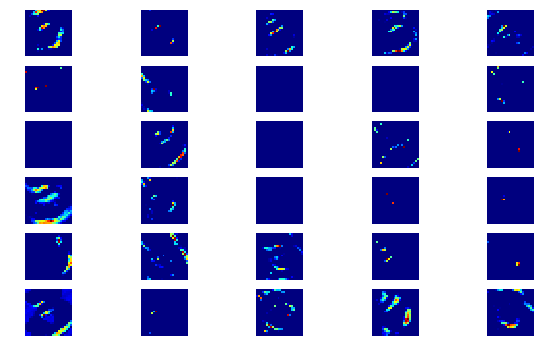

In [103]:
plt.figure(figsize = (10, 6))
for i in range(30):
  plt.subplot(6, 5, i+1)
  plt.imshow(visual_layer1[0, :, :, i], cmap = plt.get_cmap('jet'))
  plt.axis('off')

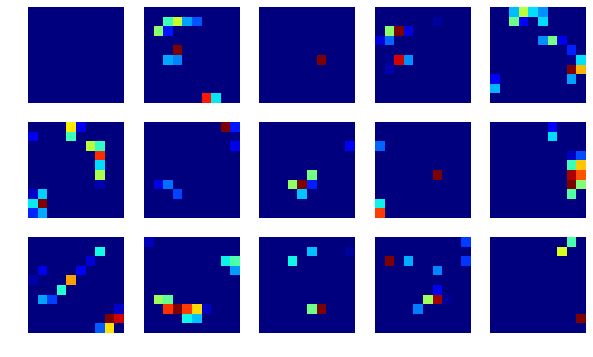

In [106]:
plt.figure(figsize = (10, 6))
for i in range(15):
  plt.subplot(3, 5, i+1)
  plt.imshow(visual_layer2[0, :, :, i], cmap = plt.get_cmap('jet'))
  plt.axis('off')